#### 1. Introduction ####

This is an exploratory data analysis done on a healthcare dataset downloaded from Kaggle. The dataset is availavle on via this link https://www.kaggle.com/datasets/prasad22/healthcare-dataset. The dataset is entirely synthetic but designs to mimc real-world healthcare data. I will be exploring this dataset to uncover any meaningful trends and insight within it. I will be combining Python libraries with SQL for this task

In [33]:
#import all the necessary modules
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
%matplotlib inline
import seaborn as sns
import plotly.express as px

In [35]:
#Load the CSV file into SQLite3 with pandas
df = pd.read_csv(r"C:\Users\hp\Downloads\healthcare_dataset.csv")
conn = sqlite3.connect('HEATHCARE.db')
cursor = conn.cursor()

In [ ]:
df.to_sql('HEALTHCARE_DATA', conn)

This allows for quering the data using either pandas alone or a combination of pandas and SQL queries, as demonstrated below

In [52]:
#Testing the data was successfully loaded
df.head(3)

Name  Age  Gender Blood Type Medical Condition Date of Admission  \
0  Bobby JacksOn   30    Male         B-            Cancer        2024-01-31   
1   LesLie TErRy   62    Male         A+           Obesity        2019-08-20   
2    DaNnY sMitH   76  Female         A-           Obesity        2022-09-22   

             Doctor         Hospital Insurance Provider  Billing Amount  \
0     Matthew Smith  Sons and Miller         Blue Cross    18856.281306   
1   Samantha Davies          Kim Inc           Medicare    33643.327287   
2  Tiffany Mitchell         Cook PLC              Aetna    27955.096079   

   Room Number Admission Type Discharge Date   Medication  Test Results  
0          328         Urgent     2024-02-02  Paracetamol        Normal  
1          265      Emergency     2019-08-26    Ibuprofen  Inconclusive  
2          205      Emergency     2022-10-07      Aspirin        Normal

In [54]:
#Testing the dataset was successfully loaded to sqlite3 database for SQL querying
test = pd.read_sql('SELECT * FROM HEALTHCARE_DATA LIMIT 3', conn)
test

Name  Age  Gender Blood Type Medical Condition Date of Admission  \
0  Bobby Jackson   30    Male         B-            Cancer        2024-01-31   
1   Leslie Terry   62    Male         A+           Obesity        2019-08-20   
2    Danny Smith   76  Female         A-           Obesity        2022-09-22   

             Doctor         Hospital Insurance Provider  Billing Amount  \
0     Matthew Smith  Sons and Miller         Blue Cross    18856.281306   
1   Samantha Davies          Kim Inc           Medicare    33643.327287   
2  Tiffany Mitchell         Cook PLC              Aetna    27955.096079   

   Room Number Admission Type Discharge Date   Medication  Test Results  
0          328         Urgent     2024-02-02  Paracetamol        Normal  
1          265      Emergency     2019-08-26    Ibuprofen  Inconclusive  
2          205      Emergency     2022-10-07      Aspirin        Normal

### 2. Understanding the Dataset ###

The next step is to achieve some basic understanding of the characteristics of this dataset

In [56]:
#To get the number of rows and columns
print(f'This healthcare data has {df.shape[0]} rows and {df.shape[1]} columns')

This healthcare data has 55500 rows and 15 columns


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

This shows all the 15 columns, the number of null values, and the data types. This dataset has no null values.

### 3. Preparing the data for analysis ###

While this datset does not have null values, there are some imperfections in the name and hospital columns which meed to be fixed for more accurate analysis.

In [62]:
df.head(5)

Name  Age  Gender Blood Type Medical Condition Date of Admission  \
0  Bobby JacksOn   30    Male         B-            Cancer        2024-01-31   
1   LesLie TErRy   62    Male         A+           Obesity        2019-08-20   
2    DaNnY sMitH   76  Female         A-           Obesity        2022-09-22   
3   andrEw waTtS   28  Female         O+          Diabetes        2020-11-18   
4  adrIENNE bEll   43  Female        AB+            Cancer        2022-09-19   

             Doctor                    Hospital Insurance Provider  \
0     Matthew Smith             Sons and Miller         Blue Cross   
1   Samantha Davies                     Kim Inc           Medicare   
2  Tiffany Mitchell                    Cook PLC              Aetna   
3       Kevin Wells  Hernandez Rogers and Vang,           Medicare   
4    Kathleen Hanna                 White-White              Aetna   

   Billing Amount  Room Number Admission Type Discharge Date   Medication  \
0    18856.281306          328         Urgent     2024-02-02  Paracetamol   
1    33643.327287          265      Emergency     2019-08-26    Ibuprofen   
2    27955.096079          205      Emergency     2022-10-07      Aspirin   
3    37909.782410          450       Elective     2020-12-18    Ibuprofen   
4    14238.317814          458         Urgent     2022-10-09   Penicillin   

   Test Results  
0        Normal  
1  Inconclusive  
2        Normal  
3      Abnormal  
4      Abnormal

The issues with the name column is immediately obvious. The data waas entered using a mix of uppercase and lowercase characters.

In [64]:
#Fixing the data in the name column
df['Name'] = df['Name'].str.title()
df['Name'].head(5)

0    Bobby Jackson
1     Leslie Terry
2      Danny Smith
3     Andrew Watts
4    Adrienne Bell
Name: Name, dtype: object

However, the code above only corrects the 'Name' column in the dataframe. The table in the SQL database is yet to be corrected so the mixed characters problem will still exist if the table is queries with SQL.

In [66]:
#Write records stored in the corrected DataFrame to a SQL database.

df.to_sql('HEALTHCARE_DATA', conn, if_exists='replace', index=False)
check_names = pd.read_sql('SELECT Name FROM HEALTHCARE_DATA LIMIT 3', conn)
check_names

Name
0  Bobby Jackson
1   Leslie Terry
2    Danny Smith

The error in the hospital name is a little less evident until the column entries are closely inspected.

In [68]:
df['Hospital'].head(30)

0                 Sons and Miller
1                         Kim Inc
2                        Cook PLC
3      Hernandez Rogers and Vang,
4                     White-White
5                  Nunez-Humphrey
6                 Group Middleton
7     Powell Robinson and Valdez,
8                   Sons Rich and
9                  Padilla-Walker
10                Schaefer-Porter
11                    Lyons-Blair
12      Powers Miller, and Flores
13               Rivera-Gutierrez
14                Morris-Arellano
15                 Cline-Williams
16                Cervantes-Wells
17     Torres, and Harrison Jones
18                    Houston PLC
19                    Hammond Ltd
20                      Jones LLC
21                 Williams-Davis
22                     Clark-Mayo
23                 and Sons Smith
24                   Wilson Group
25                  Garner-Bowman
26        Brown, and Jones Weaver
27                  Serrano-Dixon
28                 Gardner-Miller
29            

Some of the hospital names are clearly wrongly entered. The biggest problems are commas (,) in the wrong place, such as at the end of the entry and the presence of 'and' in the beginning or end of the entry. E.g. 'Sons Rich and', 'and Sons Smith'.
Since the hospital names are synthetic, there is no way to cross-reference the entered names with possible correct names. Manually editing them is also out of question considering the size of the rows (55,000!)
To fix this, I will assume 'and' will always be the second word in the hospital name and write a function to edit the rows in that column.

In [70]:
punctuations = [',']
def fix_hospital(hospital):
    corrected_name = '' #creating the accumulator variable
    for char in hospital:
        if char not in punctuations: #removing the punctuations
            corrected_name += char
    if 'and' in corrected_name:
        words = corrected_name.split()
        words = [word for word in words if word != 'and']
        new_name = words[0] + ' and ' + ' '.join(words[1:])
        return new_name
    else: 
        return corrected_name


In [72]:
#Call the correction function on the hospital name
df['Hospital'] = df['Hospital'].apply(func=fix_hospital)
df['Hospital'].head(30)

0                Sons and Miller
1                        Kim Inc
2                       Cook PLC
3      Hernandez and Rogers Vang
4                    White-White
5                 Nunez-Humphrey
6                Group Middleton
7     Powell and Robinson Valdez
8                  Sons and Rich
9                 Padilla-Walker
10               Schaefer-Porter
11                   Lyons-Blair
12      Powers and Miller Flores
13              Rivera-Gutierrez
14               Morris-Arellano
15                Cline-Williams
16               Cervantes-Wells
17     Torres and Harrison Jones
18                   Houston PLC
19                   Hammond Ltd
20                     Jones LLC
21                Williams-Davis
22                    Clark-Mayo
23                Sons and Smith
24                  Wilson Group
25                 Garner-Bowman
26        Brown and Jones Weaver
27                 Serrano-Dixon
28                Gardner-Miller
29                Guerrero-Boone
Name: Hosp

In [ ]:
#Write records stored in the corrected DataFrame to a SQL database.
df.to_sql('HEALTHCARE_DATA', conn, if_exists='replace', index=False)

Next step is to check if there are any rows that are exact duplicates

In [78]:
df.loc[df.duplicated()]

Name  Age  Gender Blood Type Medical Condition  \
50023        Samuel Joyce   56    Male         O+         Arthritis   
50040    Kimberly Vasquez   26    Male         A-           Obesity   
50055      Scott Thornton   55  Female         B-           Obesity   
50070         William Lee   27  Female         O+         Arthritis   
50078  Christopher Norris   38    Male        AB-         Arthritis   
...                   ...  ...     ...        ...               ...   
55461      Connor Compton   63    Male         A+            Asthma   
55462       Alyssa Miller   35  Female         A-          Diabetes   
55464        Chris Hughes   35  Female        AB-           Obesity   
55484     Kenneth Alvarez   80    Male         O+            Cancer   
55491       Linda Griffin   47  Female         O+           Obesity   

      Date of Admission             Doctor                   Hospital  \
50023        2022-11-03     Krista Hartman             Thomas-Ballard   
50040        2023-10-23   Jennifer Bennett                  Cowan Inc   
50055        2021-04-08      Joshua Ingram                 Keller LLC   
50070        2020-01-31  Lauren Montgomery              Winters-Simon   
50078        2023-01-14       Denise Blair                Inc Morales   
...                 ...                ...                        ...   
55461        2021-08-21     Jonathan Allen  Willis and Mullins Bowers   
55462        2022-06-30         Ryan Price          Shelton-Gallagher   
55464        2024-02-28      Katelyn Perry               Lyons-Hansen   
55484        2022-05-05      Andrew Conner              Sons and Mayo   
55491        2020-06-21     Danielle Davis    King and Jordan Johnson   

      Insurance Provider  Billing Amount  Room Number Admission Type  \
50023   UnitedHealthcare    15654.830587          157         Urgent   
50040   UnitedHealthcare    38142.109678          313         Urgent   
50055           Medicare    30894.904511          455         Urgent   
50070              Cigna    46229.434901          153       Elective   
50078           Medicare     9072.127142          452      Emergency   
...                  ...             ...          ...            ...   
55461           Medicare     1936.702824          375      Emergency   
55462   UnitedHealthcare     2210.460898          289       Elective   
55464         Blue Cross    11889.154513          128      Emergency   
55484              Cigna    45653.802310          114       Elective   
55491              Aetna    15715.551079          310      Emergency   

      Discharge Date   Medication  Test Results  
50023     2022-11-22      Aspirin  Inconclusive  
50040     2023-11-18   Penicillin      Abnormal  
50055     2021-04-15      Aspirin      Abnormal  
50070     2020-02-13      Lipitor        Normal  
50078     2023-02-12   Penicillin        Normal  
...              ...          ...           ...  
55461     2021-09-16  Paracetamol        Normal  
55462     2022-07-27   Penicillin        Normal  
55464     2024-03-14  Paracetamol      Abnormal  
55484     2022-05-17      Aspirin        Normal  
55491     2020-06-25      Lipitor      Abnormal  

[534 rows x 15 columns]

In [80]:
#drop all the 534 rows that are exact duplicates
df = df.drop_duplicates()
#Write records stored in the corrected DataFrame to a SQL database.
df.to_sql('HEALTHCARE_DATA', conn, if_exists='replace', index=False)
print(f'This healthcare data now has {df.shape[0]} rows and {df.shape[1]} columns')

This healthcare data now has 54966 rows and 15 columns


Of all the columns, 'Name' is probably the most unique of them
However, there are still multiple rows that contain the same name.

In [82]:
df.loc[df.duplicated(subset=['Name'])]

Name  Age  Gender Blood Type Medical Condition  \
235        Michael Smith   20    Male        AB+         Arthritis   
532        Paul Martinez   59    Male         A+      Hypertension   
929          Karen Price   41    Male         B-         Arthritis   
1246          John Moore   45    Male         O-           Obesity   
1255         Jason Smith   75    Male        AB+      Hypertension   
...                  ...  ...     ...        ...               ...   
55495  Elizabeth Jackson   42  Female         O+            Asthma   
55496         Kyle Perez   61  Female        AB-           Obesity   
55497       Heather Wang   38  Female         B+      Hypertension   
55498     Jennifer Jones   43    Male         O-         Arthritis   
55499       James Garcia   53  Female         O+         Arthritis   

      Date of Admission           Doctor                     Hospital  \
235          2020-03-27    Eddie Jackson      Huang and Travis Thomas   
532          2019-06-27   William Carter                   Massey Inc   
929          2019-09-23    Carla Burgess                 Castro-Gomez   
1246         2021-06-30  Brian Hicks III                  Benson-Cook   
1255         2021-01-11       Mark Adams                 Moore-Taylor   
...                 ...              ...                          ...   
55495        2020-08-16    Joshua Jarvis               Jones-Thompson   
55496        2020-01-23  Taylor Sullivan                 Tucker-Moyer   
55497        2020-07-13   Joe Jacobs DVM  Mahoney and Johnson Vasquez   
55498        2019-05-25   Kimberly Curry      Jackson and Todd Castro   
55499        2024-04-02    Dennis Warren               Henry and Sons   

      Insurance Provider  Billing Amount  Room Number Admission Type  \
235     UnitedHealthcare     2784.582490          164      Emergency   
532             Medicare    48035.369335          414         Urgent   
929             Medicare    29465.817089          271         Urgent   
1246            Medicare    32095.926061          202         Urgent   
1255    UnitedHealthcare    20198.742738          176       Elective   
...                  ...             ...          ...            ...   
55495         Blue Cross     2650.714952          417       Elective   
55496              Cigna    31457.797307          316       Elective   
55497   UnitedHealthcare    27620.764717          347         Urgent   
55498           Medicare    32451.092358          321       Elective   
55499              Aetna     4010.134172          448         Urgent   

      Discharge Date  Medication  Test Results  
235       2020-04-16     Aspirin  Inconclusive  
532       2019-07-19   Ibuprofen      Abnormal  
929       2019-09-26     Lipitor      Abnormal  
1246      2021-07-29  Penicillin  Inconclusive  
1255      2021-01-22     Lipitor  Inconclusive  
...              ...         ...           ...  
55495     2020-09-15  Penicillin      Abnormal  
55496     2020-02-01     Aspirin        Normal  
55497     2020-08-10   Ibuprofen      Abnormal  
55498     2019-05-31   Ibuprofen      Abnormal  
55499     2024-04-29   Ibuprofen      Abnormal  

[14731 rows x 15 columns]

Up to 14731 rows have duplicated names. But then, multiple individuals can have the same name. 
Also, considering the peculiarity of healthcare data, one individual may visit the hospital multiple times, leading to multiple entries in the dataset. 
So, we have to be careful about defining who a unique individual is.
Admittedly this is a **very subjective process**. But based on my knowledge as doctor, I would define the uniqueness as follows:

I will divide the columns into patient-defined and hospital-defined.
Patient-defined are the columns most likely entered by the patient. For example, you would expect a patient to enter their own name, age, gender. They might also enter their own blood type and medical condition. Less likely, but still possibile

The hospital-defined columns are those you expect the hospital staff to enter themselves, including Date of admission, discharge date, hospital, doctor, insurance provider, admission type, medication, test results, billing amount and room number. I would expect them to enter the blood type and medical condition in ideal circumstances as well.

**While errors can occur from both end**, I will argue that the errors are more likely to be from the patient's side. Perhaps a patient was rushed in an during an emergency and the friend or relative of the patient entered the wrong age? Or hurriedly picked the wrong gender because of the nature of the patient presentation?

But what are the chances of two indivuals also having the exact same date of admission and discharge, and billing amount in the same hospital? I would argue pretty low.

Therefore, I will define the uniqueness of each individual based on the hospital-defined data which should have a higher degree of accuracy. Hence, if any two individuals have the same Name, Date of Admission, Discharge Date, Billing Amount, and Hospital, they will be treated as duplicates and only one will be kept

In [84]:
df = df.drop_duplicates(subset=['Name', 'Date of Admission', 'Discharge Date', 'Billing Amount', 'Hospital'])
#Write records stored in the corrected DataFrame to a SQL database.
df.to_sql('HEALTHCARE_DATA', conn, if_exists='replace', index=False)
df.reset_index(drop=True) #Just to be sure the rows are properly indexed
print(f'This healthcare data now has {df.shape[0]} rows and {df.shape[1]} columns')

This healthcare data now has 50000 rows and 15 columns


To round up the data cleaning and preparation, I'll convert the dtype of the Discharge Date and Date of admission to datetime format to allow for analysis of those columns.

In [103]:
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])


The dataset is now ready for analysis!

# 3. Exploratory Analysis #

## 3.1 Univariate Analysis ##

As is typical for exploratory data analysis, the first step is to conduct univariate analysis on all relevant colums. This helps to achieve better understanding of the distribution and frequency of the data.

In [102]:
df.describe()

Age              Date of Admission  Billing Amount  \
count  50000.000000                          50000    50000.000000   
mean      51.580360  2021-11-01 07:31:59.231999744    25555.691557   
min       18.000000            2019-05-08 00:00:00    -2008.492140   
25%       35.000000            2020-07-28 18:00:00    13239.403094   
50%       52.000000            2021-11-01 00:00:00    25541.302839   
75%       68.000000            2023-02-02 00:00:00    37853.996819   
max       85.000000            2024-05-07 00:00:00    52764.276736   
std       19.582194                            NaN    14215.932247   

        Room Number                 Discharge Date  
count  50000.000000                          50000  
mean     301.032260  2021-11-16 19:32:47.616000256  
min      101.000000            2019-05-09 00:00:00  
25%      202.000000            2020-08-13 00:00:00  
50%      302.000000            2021-11-17 00:00:00  
75%      400.000000            2023-02-18 00:00:00  
max      500.000000            2024-06-06 00:00:00  
std      115.228819                            NaN

The .describe() method does a good job of summarizing the numerical data. The table above shows us important information such as the minimum and mand maximum values, as well as the mean and standard deviation.

Let us now look into some of the non-numerical values

In [180]:
gender = pd.read_sql('SELECT Gender, COUNT(*) AS FREQUENCY FROM HEALTHCARE_DATA GROUP BY Gender', conn)
gender.style.hide(axis="index")

In [184]:
blood_type = pd.read_sql('SELECT "Blood Type", COUNT(*) AS FREQUENCY FROM HEALTHCARE_DATA GROUP BY "Blood Type" ORDER BY FREQUENCY DESC', conn)
blood_type.index = pd.RangeIndex(start=1, stop=len(blood_type) + 1)
blood_type

Blood Type  FREQUENCY
1        AB+       6291
2         B+       6278
3         A-       6261
4        AB-       6259
5         A+       6246
6         O+       6235
7         B-       6230
8         O-       6200

In [50]:
med_condition = pd.read_sql('SELECT "Medical Condition", COUNT(*) AS FREQUENCY FROM HEALTHCARE_DATA GROUP BY "Medical Condition" ORDER BY FREQUENCY DESC', conn)
med_condition.index = pd.RangeIndex(start=1, stop=len(med_condition) + 1)
med_condition

Medical Condition  FREQUENCY
1         Arthritis       8439
2          Diabetes       8384
3      Hypertension       8319
4            Cancer       8294
5           Obesity       8292
6            Asthma       8272

In [193]:
doctors = pd.read_sql('SELECT "Doctor", COUNT(*) AS FREQUENCY FROM HEALTHCARE_DATA GROUP BY "Doctor" ORDER BY FREQUENCY DESC', conn)
doctors.index = pd.RangeIndex(start=1, stop=len(doctors) + 1)
doctors

Doctor  FREQUENCY
1        Michael Smith         24
2           John Smith         21
3         Robert Smith         19
4      Michael Johnson         19
5          David Smith         18
...                ...        ...
40337   Aaron Anderson          1
40338  Aaron Alexander          1
40339    Aaron Aguilar          1
40340      Aaron Adams          1
40341    Aaron Acevedo          1

[40341 rows x 2 columns]

In [191]:
hospitals = pd.read_sql('SELECT "Hospital", COUNT(*) AS FREQUENCY FROM HEALTHCARE_DATA GROUP BY "Hospital" ORDER BY FREQUENCY DESC', conn)
hospitals.index = pd.RangeIndex(start=1, stop=len(hospitals) + 1)
hospitals

Hospital  FREQUENCY
1                       LLC Smith         40
2                       Smith Ltd         35
3                       Ltd Smith         35
4                     Johnson PLC         35
5                       Smith PLC         33
...                           ...        ...
39270   Abbott and Moore Williams          1
39271   Abbott and Gross Anderson          1
39272  Abbott and Campbell Palmer          1
39273                  Abbott Ltd          1
39274                  Abbott Inc          1

[39274 rows x 2 columns]

In [195]:
insurance_providers = pd.read_sql('SELECT "Insurance Provider", COUNT(*) AS FREQUENCY FROM HEALTHCARE_DATA GROUP BY "Insurance Provider" ORDER BY FREQUENCY DESC', conn)
insurance_providers.index = pd.RangeIndex(start=1, stop=len(insurance_providers) + 1)
insurance_providers

Insurance Provider  FREQUENCY
1              Cigna      10091
2           Medicare      10058
3   UnitedHealthcare      10002
4         Blue Cross      10001
5              Aetna       9848

In [201]:
admission_type = pd.read_sql('SELECT "Admission Type", COUNT(*) AS FREQUENCY FROM HEALTHCARE_DATA GROUP BY "Admission Type" ORDER BY FREQUENCY DESC', conn)
admission_type.index = pd.RangeIndex(start=1, stop=len(admission_type) + 1)
admission_type

Admission Type  FREQUENCY
1       Elective      16827
2         Urgent      16784
3      Emergency      16389

In [203]:
medications = pd.read_sql('SELECT "Medication", COUNT(*) AS FREQUENCY FROM HEALTHCARE_DATA GROUP BY "Medication" ORDER BY FREQUENCY DESC', conn)
medications.index = pd.RangeIndex(start=1, stop=len(medications) + 1)
medications

Medication  FREQUENCY
1      Lipitor      10032
2    Ibuprofen      10003
3   Penicillin       9995
4      Aspirin       9992
5  Paracetamol       9978

In [205]:
test_results = pd.read_sql('SELECT "Test Results", COUNT(*) AS FREQUENCY FROM HEALTHCARE_DATA GROUP BY "Test Results" ORDER BY FREQUENCY DESC', conn)
test_results.index = pd.RangeIndex(start=1, stop=len(test_results) + 1)
test_results

Test Results  FREQUENCY
1      Abnormal      16772
2        Normal      16684
3  Inconclusive      16544

# Key Observations: #
- The patient's ages range from 18 to 85 with an average age of 51.6
- The dataset spans a five-year period between 2019-05-08 and 2024-06-06
- Two genders are reprsented and females are slightly more tha males
- 8 different bllod types were noted, with AB+ being the most common type
- Michael Smith was the most consulted of the 40,341 doctors in the data
- LLC Smith saw the highest load of patients of the 39,274 hospitals captured
- There were five different insurance providers, all of which covered roughly 10,000 patients each

Let us now visualize the information above

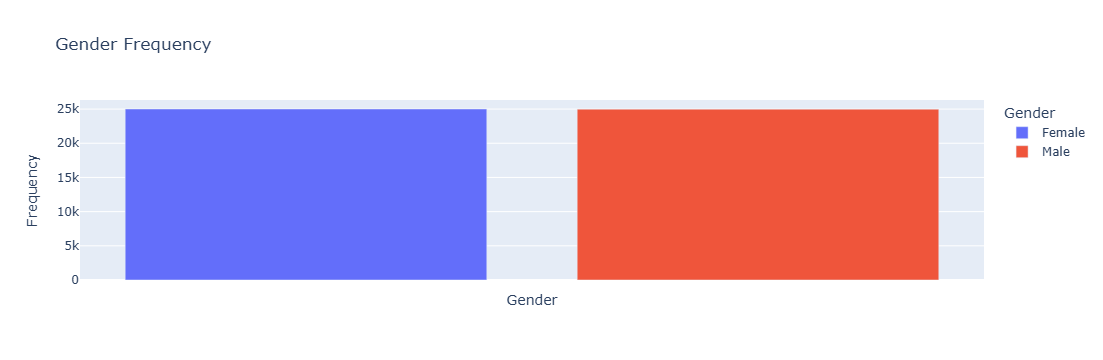

In [330]:
fig = px.bar(gender, x='Gender', y='FREQUENCY', 
             title='Gender Frequency', 
             labels={'FREQUENCY':'Frequency'},
             color='Gender')

fig.update_layout(xaxis_showticklabels=False)
fig.show()


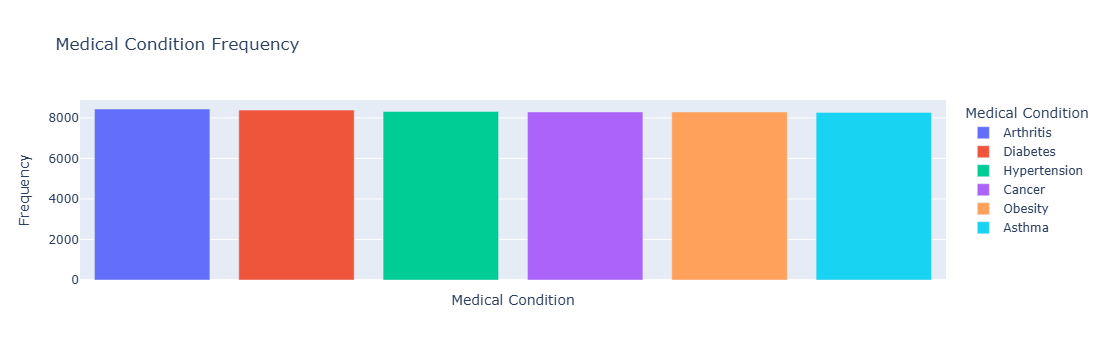

In [54]:
fig = px.bar(med_condition, x='Medical Condition', y='FREQUENCY', 
             title='Medical Condition Frequency',
             labels={'FREQUENCY':'Frequency'},
             color='Medical Condition')
fig.update_layout(xaxis_showticklabels=False)
fig.show()

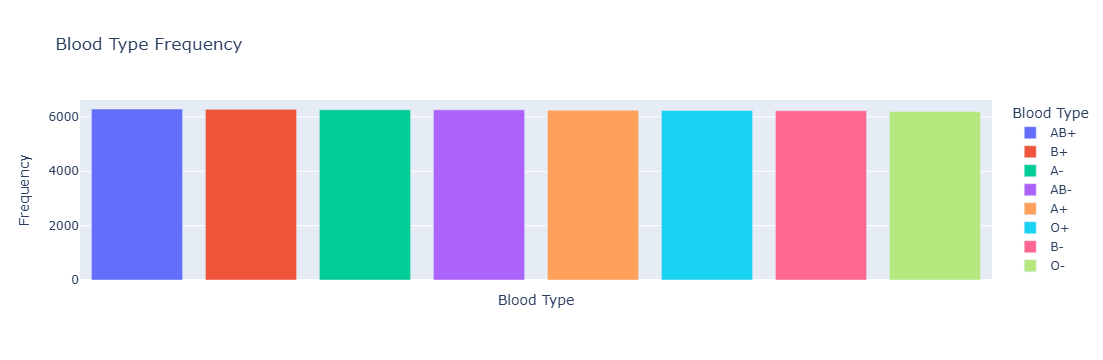

In [186]:
fig = px.bar(blood_type, x='Blood Type', y='FREQUENCY', 
             title='Blood Type Frequency',
             labels={'FREQUENCY':'Frequency'},
             color='Blood Type')
fig.update_layout(xaxis_showticklabels=False)
fig.show()

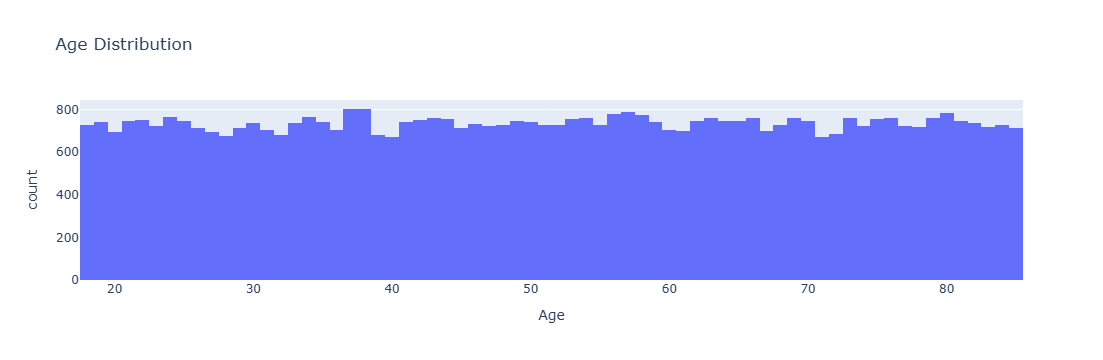

In [348]:
fig = px.histogram(df, x='Age', title='Age Distribution')
fig.show()

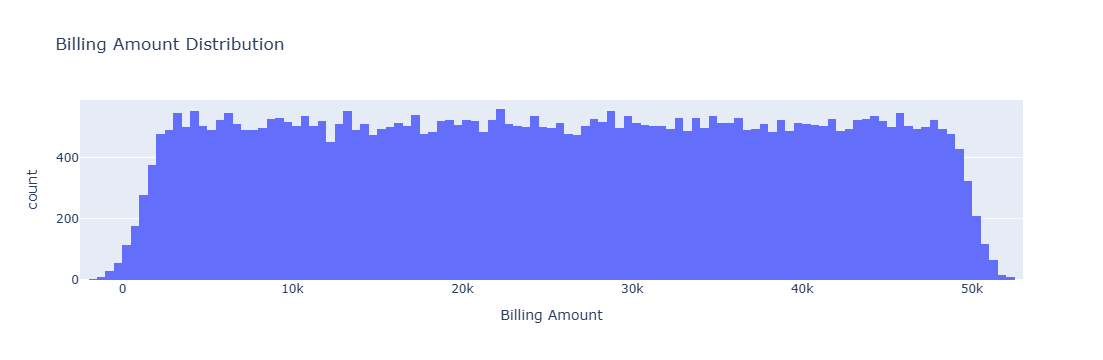

In [188]:
fig = px.histogram(df, x='Billing Amount', title='Billing Amount Distribution')
fig.show()

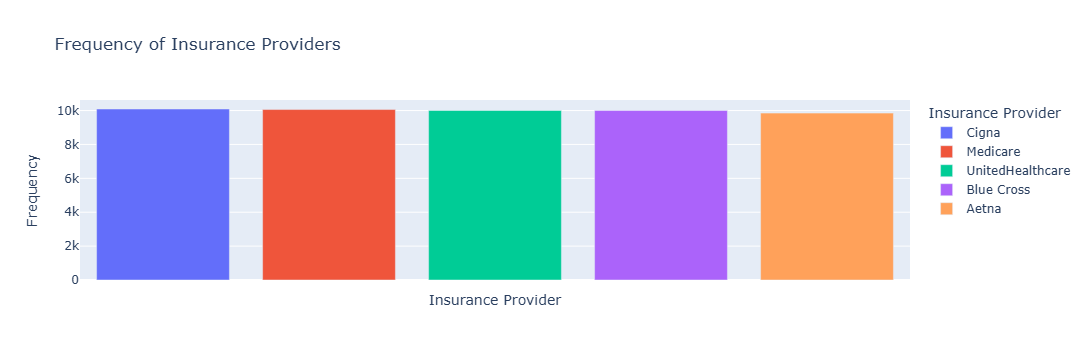

In [356]:
fig = px.bar(insurance_providers, x='Insurance Provider', y='FREQUENCY', 
             title='Frequency of Insurance Providers',
             labels={'FREQUENCY':'Frequency'},
             color='Insurance Provider')
fig.update_layout(xaxis_showticklabels=False)
fig.show()

## 3.2 Multivariate Analysis ##

Now, let's analyze the data for meaningful relationships between multiple columns

In [56]:
statement = 'SELECT "Medical Condition", Medication, Count(Medication) AS Frequency FROM HEALTHCARE_DATA GROUP BY "Medical Condition", Medication'
meds = pd.read_sql(statement, conn)
meds

Medical Condition   Medication  Frequency
0          Arthritis      Aspirin       1733
1          Arthritis    Ibuprofen       1660
2          Arthritis      Lipitor       1663
3          Arthritis  Paracetamol       1698
4          Arthritis   Penicillin       1685
5             Asthma      Aspirin       1619
6             Asthma    Ibuprofen       1620
7             Asthma      Lipitor       1649
8             Asthma  Paracetamol       1705
9             Asthma   Penicillin       1679
10            Cancer      Aspirin       1607
11            Cancer    Ibuprofen       1683
12            Cancer      Lipitor       1725
13            Cancer  Paracetamol       1669
14            Cancer   Penicillin       1610
15          Diabetes      Aspirin       1681
16          Diabetes    Ibuprofen       1679
17          Diabetes      Lipitor       1702
18          Diabetes  Paracetamol       1627
19          Diabetes   Penicillin       1695
20      Hypertension      Aspirin       1683
21      Hypertension    Ibuprofen       1696
22      Hypertension      Lipitor       1658
23      Hypertension  Paracetamol       1669
24      Hypertension   Penicillin       1613
25           Obesity      Aspirin       1669
26           Obesity    Ibuprofen       1665
27           Obesity      Lipitor       1635
28           Obesity  Paracetamol       1610
29           Obesity   Penicillin       1713

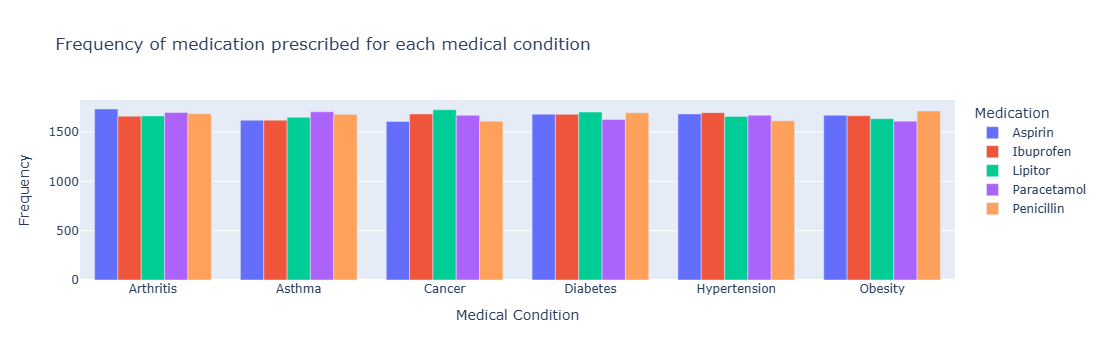

In [76]:
fig = px.bar(meds, x='Medical Condition', y='Frequency',
             color='Medication',
             barmode='group',
             title='Frequency of medication prescribed for each medical condition')
fig.show()

In [99]:
age_dist = pd.read_sql('SELECT "Medical Condition", AVG(Age) AS "Average Age", MIN(Age) AS "Minimum Age", MAX(Age) FROM HEALTHCARE_DATA GROUP BY "Medical Condition" ORDER BY "Average Age"', conn)
age_dist

Medical Condition  Average Age  Minimum Age  MAX(Age)
0           Obesity    51.379764           18        85
1            Cancer    51.525802           18        85
2          Diabetes    51.549380           18        85
3         Arthritis    51.601138           18        85
4      Hypertension    51.699964           18        85
5            Asthma    51.726064           18        85

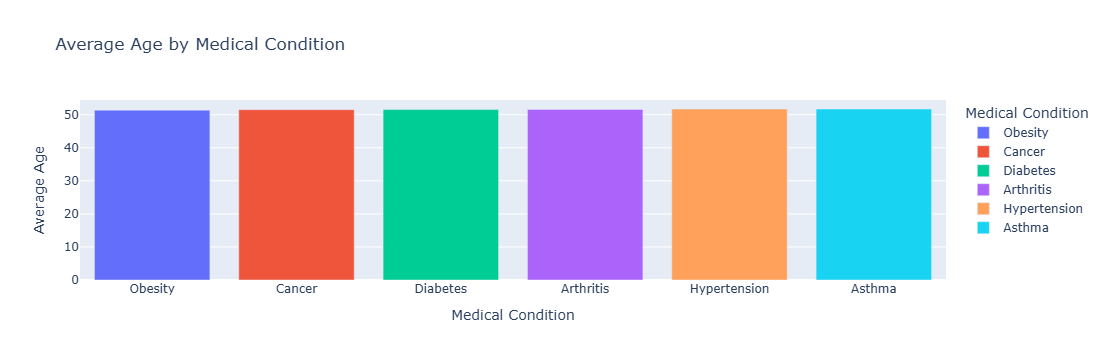

In [101]:
fig = px.bar(age_dist, x='Medical Condition', y='Average Age',
             color='Medical Condition',
             title='Average Age by Medical Condition')
fig.show()

In [103]:
bills = pd.read_sql('SELECT "Medical Condition", AVG("Billing Amount") AS "Average Cost of Treatment" FROM HEALTHCARE_DATA GROUP BY "Medical Condition" ORDER BY "Average Cost of Treatment"', conn)
bills

Medical Condition  Average Cost of Treatment
0            Cancer               25234.696065
1         Arthritis               25486.204669
2      Hypertension               25494.217979
3          Diabetes               25654.531904
4            Asthma               25681.211624
5           Obesity               25784.002661

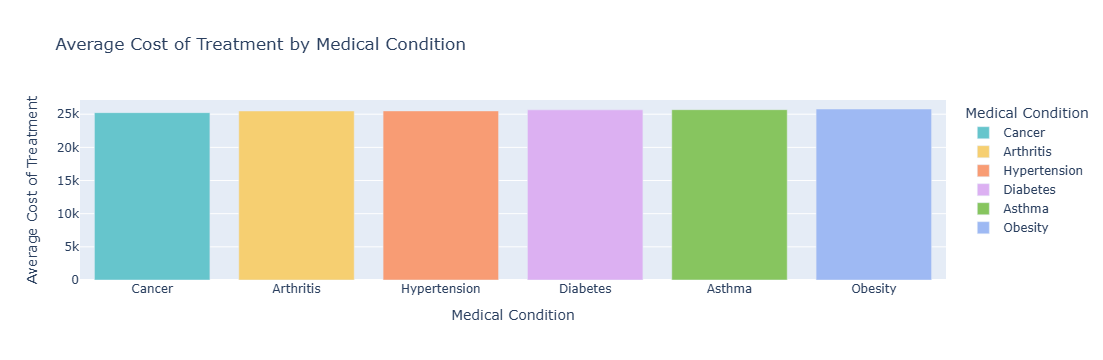

In [121]:
fig = px.bar(bills, x='Medical Condition', y='Average Cost of Treatment',
             color='Medical Condition',
             title='Average Cost of Treatment by Medical Condition')
fig.show()

In [133]:
df['Length of Stay'] = df['Discharge Date'] - df['Date of Admission'] #To create a new column for the length of stay in the hospital for each patient
df['Days on Admission'] = df['Length of Stay'].dt.days #To extract date from timedelta object so df can be copied into the sqlite3 database since SQL does not support timedelta type
df = df.drop(["Length of Stay"], axis=1)
df.to_sql('HEALTHCARE_DATA', conn, if_exists='replace', index=False)

In [184]:
#Calculate the average stay for each medical condition
avg_stay = pd.read_sql('SELECT "Medical Condition", AVG("Days on Admission") AS "Average Length of Stay" FROM HEALTHCARE_DATA GROUP BY "Medical Condition" ORDER BY "Average Length of Stay"', conn)
avg_stay

Medical Condition  Average Length of Stay
0          Diabetes               15.407681
1      Hypertension               15.446929
2           Obesity               15.456223
3            Cancer               15.472149
4         Arthritis               15.555872
5            Asthma               15.665135

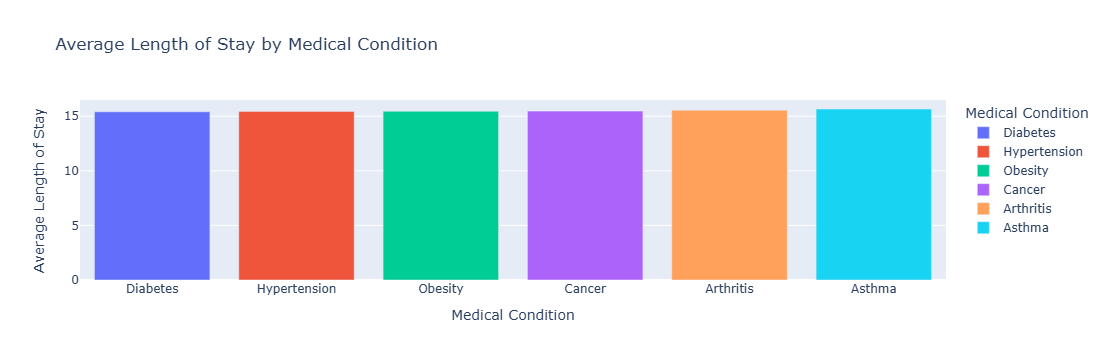

In [209]:
fig = px.bar(avg_stay, x='Medical Condition', y='Average Length of Stay',
             color='Medical Condition',
             title='Average Length of Stay by Medical Condition')
fig.show()

In [199]:
genderdist = pd.read_sql('SELECT "Medical Condition", Gender, COUNT(Gender) AS Frequency FROM HEALTHCARE_DATA GROUP BY "Medical Condition", Gender', conn)
genderdist

Medical Condition  Gender  Frequency
0          Arthritis  Female       4251
1          Arthritis    Male       4188
2             Asthma  Female       4103
3             Asthma    Male       4169
4             Cancer  Female       4166
5             Cancer    Male       4128
6           Diabetes  Female       4201
7           Diabetes    Male       4183
8       Hypertension  Female       4157
9       Hypertension    Male       4162
10           Obesity  Female       4133
11           Obesity    Male       4159

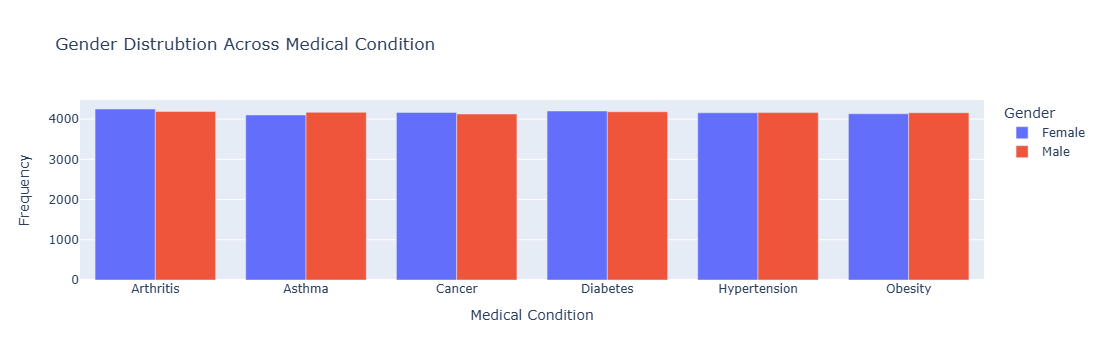

In [203]:
fig = px.bar(genderdist, x='Medical Condition', y='Frequency',
             color='Gender',
             barmode='group',
             title='Gender Distrubtion Across Medical Condition')
fig.show()

In [215]:
blood_type_dist = pd.read_sql('SELECT "Medical Condition", "Blood Type", COUNT("Blood Type") AS Frequency FROM HEALTHCARE_DATA GROUP BY "Medical Condition", "Blood Type" ORDER BY "Medical Condtion", "Blood Type", Frequency DESC', conn)
blood_type_dist

Medical Condition Blood Type  Frequency
0           Diabetes         A+       1083
1             Cancer         A+       1056
2            Obesity         A+       1041
3          Arthritis         A+       1027
4       Hypertension         A+       1026
5             Asthma         A+       1013
6       Hypertension         A-       1061
7             Asthma         A-       1056
8           Diabetes         A-       1055
9          Arthritis         A-       1050
10           Obesity         A-       1021
11            Cancer         A-       1018
12      Hypertension        AB+       1092
13            Asthma        AB+       1071
14          Diabetes        AB+       1061
15           Obesity        AB+       1035
16         Arthritis        AB+       1030
17            Cancer        AB+       1002
18            Cancer        AB-       1077
19         Arthritis        AB-       1069
20           Obesity        AB-       1036
21          Diabetes        AB-       1032
22      Hypertension        AB-       1027
23            Asthma        AB-       1018
24            Cancer         B+       1078
25         Arthritis         B+       1077
26          Diabetes         B+       1074
27           Obesity         B+       1043
28            Asthma         B+       1013
29      Hypertension         B+        993
30           Obesity         B-       1068
31         Arthritis         B-       1064
32      Hypertension         B-       1044
33          Diabetes         B-       1029
34            Cancer         B-       1017
35            Asthma         B-       1008
36         Arthritis         O+       1082
37      Hypertension         O+       1047
38          Diabetes         O+       1044
39            Asthma         O+       1041
40           Obesity         O+       1015
41            Cancer         O+       1006
42            Asthma         O-       1052
43         Arthritis         O-       1040
44            Cancer         O-       1040
45           Obesity         O-       1033
46      Hypertension         O-       1029
47          Diabetes         O-       1006

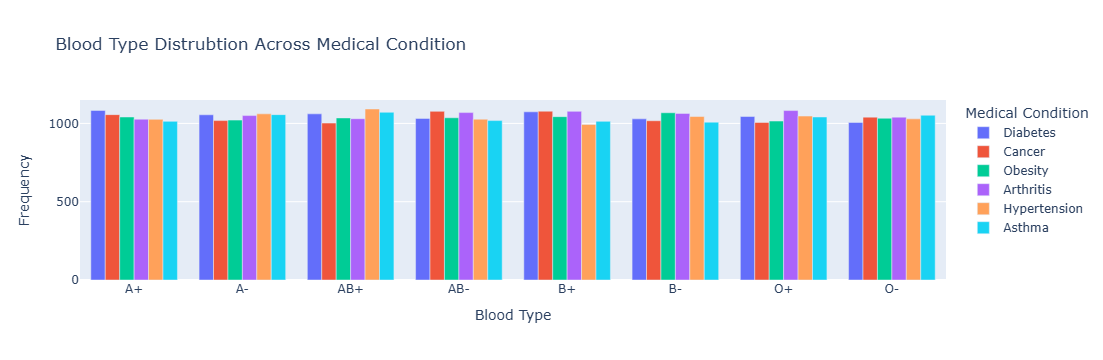

In [217]:
fig = px.bar(blood_type_dist, x='Blood Type', y='Frequency',
             color='Medical Condition',
             barmode='group',
             title='Blood Type Distrubtion Across Medical Condition')
fig.show()

In [221]:
admission = pd.read_sql('SELECT "Admission Type", AVG("Days on Admission") AS "Mean Admission Length" FROM HEALTHCARE_DATA GROUP BY "Admission Type" ORDER BY "Mean Admission Length"', conn)
admission

Admission Type  Mean Admission Length
0         Urgent              15.391325
1       Elective              15.516551
2      Emergency              15.596010

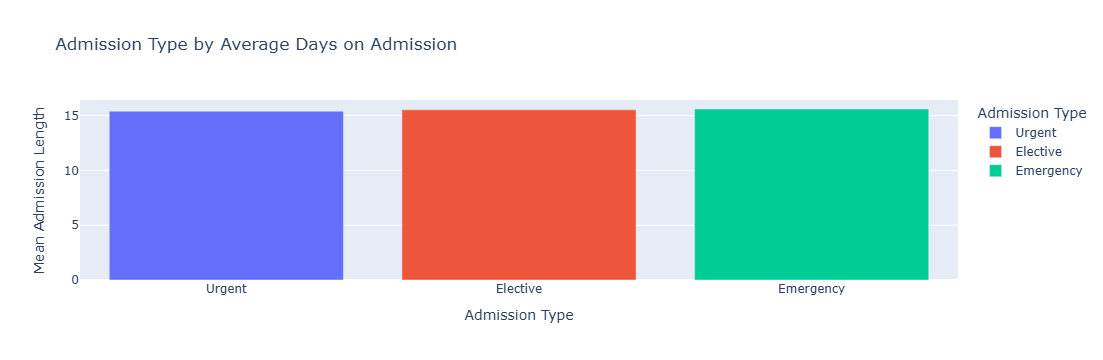

In [223]:
fig = px.bar(admission, x='Admission Type', y='Mean Admission Length',
             color='Admission Type',
             title='Admission Type by Average Days on Admission')
fig.show()

Efficacy is the capacity of a drug to produce an effect (eg, lower blood pressure). Although the data is insufficient to properly assess efficacy, one way we can estimate that with this data set is by comparing the medications and the test reults. If the patient takes a particular drug and the test result is normal then we can fairly assume the drug is producing the desired effect and vice versa.

In [234]:
efficacy = pd.read_sql('SELECT "Medical Condition", Medication, "Test Results", COUNT("Test Results") AS "Result Count" FROM HEALTHCARE_DATA GROUP BY "Medical Condition", Medication, "Test Results"', conn)
efficacy

Medical Condition   Medication  Test Results  Result Count
0          Arthritis      Aspirin      Abnormal           608
1          Arthritis      Aspirin  Inconclusive           578
2          Arthritis      Aspirin        Normal           547
3          Arthritis    Ibuprofen      Abnormal           582
4          Arthritis    Ibuprofen  Inconclusive           554
..               ...          ...           ...           ...
85           Obesity  Paracetamol  Inconclusive           530
86           Obesity  Paracetamol        Normal           542
87           Obesity   Penicillin      Abnormal           593
88           Obesity   Penicillin  Inconclusive           553
89           Obesity   Penicillin        Normal           567

[90 rows x 4 columns]

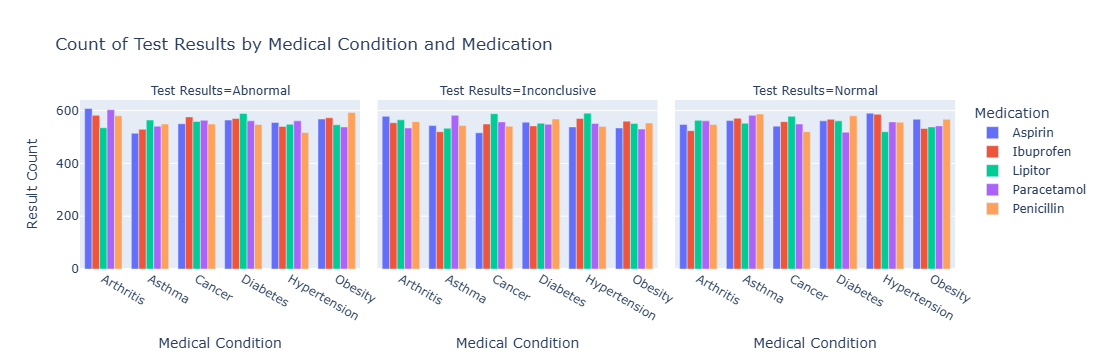

In [236]:
fig = px.bar(efficacy, x='Medical Condition', y='Result Count',
             color='Medication',
             title="Count of Test Results by Medical Condition and Medication",
             barmode='group',
             facet_col="Test Results")
fig.show()

The bar plot above shows us the relationshio between the medications prescribed, the medical condition, and the test results. For the following conditions, patients taking this particular drug had the most normal results.
Arthritis - Lipitor

Asthma - Penicilin

Cancer - Lipitor

Diabetes - Penicillin

Hypertension - Aspirin

Obesity - Aspirin and Penicillin

Hence, we can say these drugs had the most efficacy for the respective medical condition.
We can use the same logic to state that the drugs used by patients with abnormal results had the least efficacy for the respective conditions.

Let us assess the correlation between the numerical values.

In [253]:
correlation = df[['Age', 'Days on Admission', 'Billing Amount']].corr()
correlation

Age  Days on Admission  Billing Amount
Age                1.000000           0.007948       -0.001009
Days on Admission  0.007948           1.000000       -0.004595
Billing Amount    -0.001009          -0.004595        1.000000

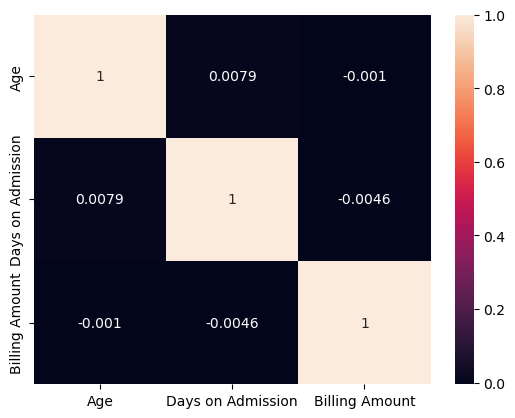

In [257]:
sns.heatmap(correlation, annot=True)
plt.show()

The table and heatmap show us that none of the values have any notable correlation.

### 4. Answering Questions about the Data ###

1. Which hospital has the highest number of admissions, and what are the most common medical conditions treated there?

In [200]:
max_hospital = pd.read_sql('SELECT "Hospital", COUNT(*) AS FREQUENCY FROM HEALTHCARE_DATA GROUP BY "Hospital" ORDER BY FREQUENCY DESC LIMIT 1', conn)
max_hospital.style.hide(axis='index')

In [202]:
max_hospital_conditions = pd.read_sql('SELECT "Medical Condition", COUNT("Medical Condition") AS FREQUENCY FROM HEALTHCARE_DATA WHERE Hospital = (SELECT Hospital FROM HEALTHCARE_DATA GROUP BY Hospital ORDER BY COUNT(*) DESC LIMIT 1) GROUP BY "Medical Condition" ORDER BY FREQUENCY DESC', conn)
max_hospital_conditions.style.hide(axis='index')

2. Which patient had the longest stay in the hospital and what condition was the person being treated for?


In [207]:
max_patients = pd.read_sql('SELECT Name, "Medical Condition", "Days on Admission" FROM HEALTHCARE_DATA WHERE "Days on Admission" = (SELECT MAX("Days on Admission") FROM HEALTHCARE_DATA)', conn)
max_patients.style.hide(axis='index')

The longest stay in the jospital was 30 days and 1,678 patients fall into this category. Let's see how the medical conditions are distributed among patients that stayed in the hopsital for 30 days

In [209]:
max_patients_conditions = pd.read_sql('SELECT "Medical Condition", COUNT(*) AS FREQUENCY FROM HEALTHCARE_DATA WHERE "Days on Admission" = 30 GROUP BY "Medical Condition" ORDER BY FREQUENCY DESC', conn)
max_patients_conditions.style.hide(axis='index')

3. Which doctor treated the most patients and what conditions did the doctor treat?

In [133]:
max_doctor = pd.read_sql('SELECT "Doctor", COUNT(*) AS FREQUENCY FROM HEALTHCARE_DATA GROUP BY "Doctor" ORDER BY FREQUENCY DESC LIMIT 1', conn)
max_doctor.style.hide(axis="index")

In [129]:
max_doctor_conditions = pd.read_sql('SELECT "Medical Condition", COUNT(*) AS FREQUENCY FROM HEALTHCARE_DATA WHERE Doctor = "Michael Smith" GROUP BY "Medical Conditions" ORDER BY FREQUENCY DESC', conn)
max_doctor_conditions.style.hide(axis="index")

4. Are there any seasonal trends in hospital admissions?

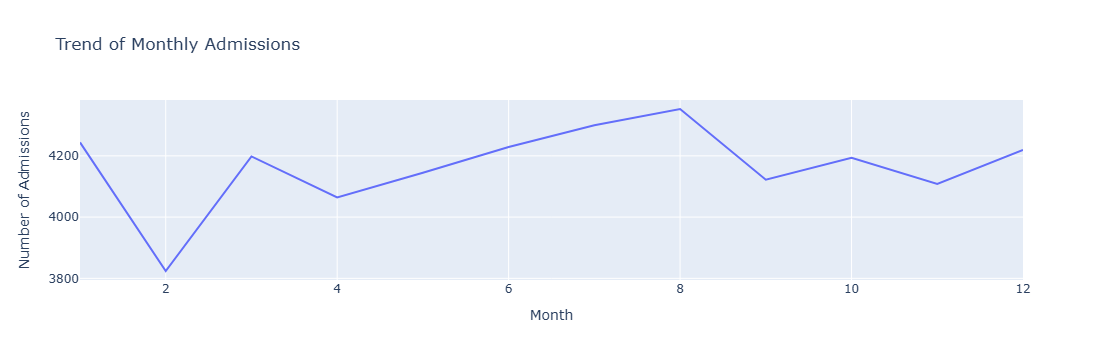

In [149]:
month_of_admission = df['Date of Admission'].dt.month.value_counts().sort_index()
month_vs_admission = pd.DataFrame({'Month': month_of_admission.index, 'Number of Admissions': month_of_admission.values})
fig = px.line(month_vs_admission, x='Month', y='Number of Admissions',
              title='Trend of Monthly Admissions')
fig.show()

5. How do test results correlate with the length of stay for patients?

In [222]:
test_vs_stay = df.groupby('Test Results')['Days on Admission'].mean().reset_index()
test_vs_stay.style.hide(axis='index')

The corr function for correlation in panda only works for numerical data so we will need to convert the test results into numerical data. One of the fastest ways to do that is with LabelEncoder from the sklearn.preprocessing module.

In [171]:
from sklearn.preprocessing import LabelEncoder

# Encode the 'Test Results' column
label_encoder = LabelEncoder()
df['Test Results Encoded'] = label_encoder.fit_transform(df['Test Results'])
mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Encoding Mapping:")
print(mapping)

Label Encoding Mapping:
{'Abnormal': 0, 'Inconclusive': 1, 'Normal': 2}


Now we can use the df.corr function to check the correlation between the encoded test results and the days on admission.

In [176]:
correlation = df['Test Results Encoded'].corr(df['Days on Admission'])
print(f'Correlation between Test Results and Length of Stay is {correlation} which is an extremely weak positive correlation')

Correlation between Test Results and Length of Stay is 0.0015290952506220828 which is an extremely weak positive correlation


In [ ]:
cursor.close()
conn.close()